In [1]:
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.2
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.

# Problem 8: Linear movies

In [56]:
import pandas as pd
import numpy as np

# help from: https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv')
df = df.sample(frac=1)

total = df.shape[0]
train_size = int(round(total*0.7))

# splitting now for 8.5
df_train = df.iloc[:train_size,:]
df_test = df.iloc[train_size:,:]

rottenTom = df[['RottenTomatoes_User','RottenTomatoes']]

matrix = np.array(rottenTom.values, 'int')

# assign input and targ var
x = matrix[:,0]
y = matrix[:,1]

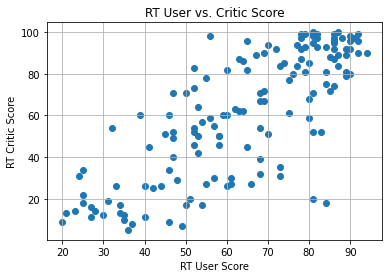

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('RT User vs. Critic Score')
plt.grid()
plt.show()

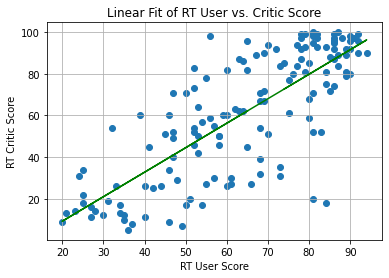

In [35]:
# help from https://www.delftstack.com/howto/matplotlib/plot-numpy-linear-fit-matplotlib-python/
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Linear Fit of RT User vs. Critic Score')

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(x,linear_model_fn(x),color="green")

plt.grid()
plt.show()

# Part 2: Easy Linear

In [68]:
# help from https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
from sklearn.linear_model import LinearRegression

sorted = matrix.copy()
sorted.sort(axis=1)
s_x = sorted[:,0]
s_y = sorted[:,1]

sk_x = np.array(x).reshape((-1,1))
sk_y = np.array(y)

fit = LinearRegression().fit(sk_x,sk_y)

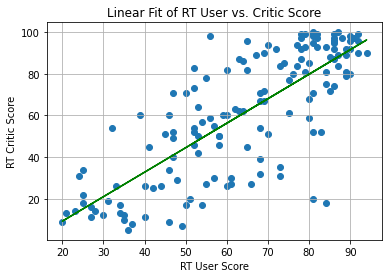

In [69]:
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Linear Fit of RT User vs. Critic Score')

plt.plot(x,fit.predict(sk_x),color="green")

plt.grid()
plt.show()

# Part 3: Not So Linear

In [70]:
# help from https://data36.com/polynomial-regression-python-scikit-learn/
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures(degree=2, include_bias=False)
cub = PolynomialFeatures(degree=3, include_bias=False)
quad_feat = quad.fit_transform(sk_x)
cub_feat = cub.fit_transform(sk_x)
quad_fit = LinearRegression().fit(quad_feat, sk_y)
cub_fit = LinearRegression().fit(cub_feat, sk_y)

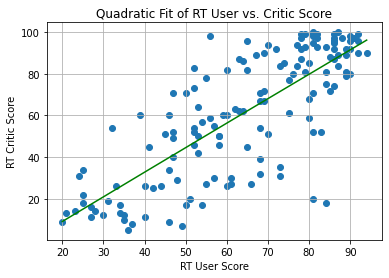

In [87]:
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Quadratic Fit of RT User vs. Critic Score')

# help from WhatIsThis on Discord, advised to sort
y_pred = quad_fit.predict(quad_feat)
sorted = np.array([x, y_pred], float)
sorted.sort()

plt.plot(sorted[0],sorted[1],color="green")

plt.grid()
plt.show()

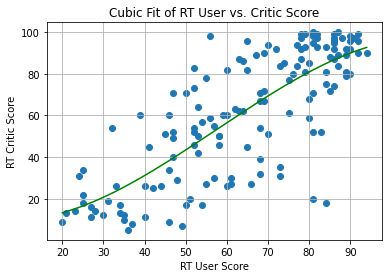

In [88]:
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Cubic Fit of RT User vs. Critic Score')

y_pred = cub_fit.predict(cub_feat)
sorted = np.array([x, y_pred], float)
sorted.sort()

plt.plot(sorted[0],sorted[1],color="green")

plt.grid()
plt.show()

# Part 4: Multiple

In [89]:
rottenTom = df[['RottenTomatoes_User','IMDB','RottenTomatoes']]

matrix = np.array(rottenTom.values, 'int')

# assign input and targ var
x = matrix[:,0]
y = matrix[:,1]
z = matrix[:,2]

In [90]:
# help from: https://www.kaggle.com/code/spidy20/3d-visualization-of-multiple-linear-regression

x_3d, y_3d = np.meshgrid(np.linspace(df.RottenTomatoes_User.min(), 
                                     df.RottenTomatoes_User.max(), 146), 
                         np.linspace(df.IMDB.min(), df.IMDB.max(), 146))

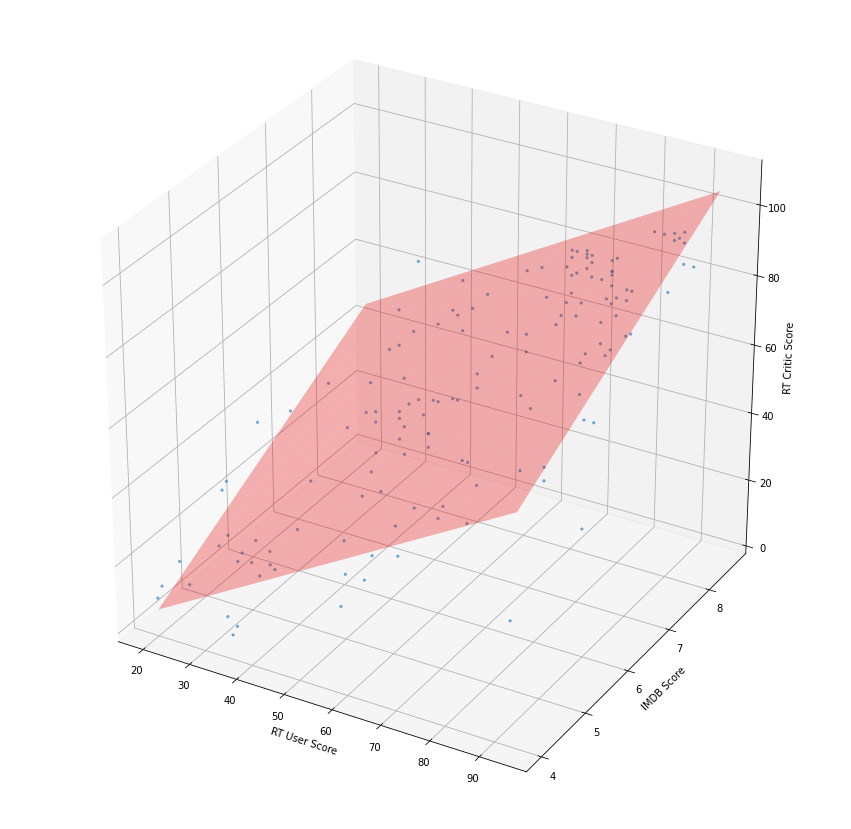

In [95]:
fig = plt.figure(figsize=(15,15))
third_dimen = fig.add_subplot(111, projection='3d')
third_dimen.scatter(x, y, z, marker='.', alpha=0.5)
third_dimen.set_xlabel('RT User Score')
third_dimen.set_ylabel('IMDB Score')
third_dimen.set_zlabel('RT Critic Score')

user_and_imdb = pd.DataFrame({'RottenTomatoes_User': x_3d.ravel(),
                              'IMDB': y_3d.ravel()})
model = LinearRegression().fit(matrix[:,:2],z)
fit = np.array(model.predict(user_and_imdb.values))

third_dimen.plot_surface(x_3d, y_3d, fit.reshape(x_3d.shape), color='red', 
                         alpha=0.3)

plt.show()

# Part 5: Regularize

In [96]:
from sklearn.linear_model import Ridge

# no real reason to make film one-hot encoding, not useful for predicting  
# Rotten Tomatoes score, so just gping to drop
df_train = df_train.drop('FILM', axis=1)
df_test = df_test.drop('FILM', axis=1)

train = df_train.drop('RottenTomatoes', axis=1)
train_label = df_train['RottenTomatoes']
test = df_test.drop('RottenTomatoes', axis=1)
test_label = df_test['RottenTomatoes']

In [97]:
alphas = [0.1,1,2]
coefs = []

for a in alphas:
  clf = Ridge(alpha=a)
  clf.fit(train, train_label)
  coefs.append(clf.coef_)
  print("test error: ", 1-clf.score(test, test_label))

test error:  2.4190888021191626e-05
test error:  0.0008234847412158519
test error:  0.0018048287888602355


Clearly 0.1 is the best regularization parameter, based off test errors.

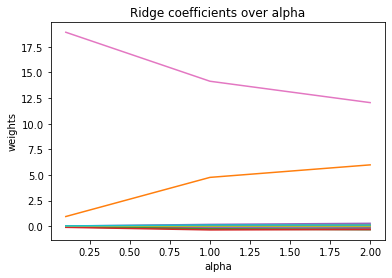

In [98]:
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients over alpha')
plt.show()

In [99]:
last_coef = coefs[2]
col = train.columns.tolist()
print(last_coef)

[ 6.10180464e-02  1.30413177e-01 -2.25099910e-02 -7.74354473e-02
 -2.16068822e-01 -3.28164707e-01  1.20583401e+01  3.05090232e-03
  6.52065886e-03 -1.12549955e-02 -3.87177237e-02  5.98386830e+00
 -3.27843352e-01 -3.23062341e-01  2.80223121e-01  5.85363288e-02
 -3.20188100e-04  7.68405000e-07  1.92623584e-05  1.12095885e-01]


In [100]:
print(train.columns)

Index(['RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm',
       'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round',
       'RT_user_norm_round', 'Metacritic_norm_round',
       'Metacritic_user_norm_round', 'IMDB_norm_round',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')


As seen by the chart above, there were only two features that were deemed useful for predictions. By matching the coefficients to the features, it seems only RT_norm and RT_norm_round were useful. All the rest had pretty low weights.